<a href="https://colab.research.google.com/github/YahiaML/Patients-attendance-data-investigation/blob/main/Patients_attendance_data_investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project: Investigate a Dataset - [No-show appointments]


**Note:**

This data was cleaned from original data on Kaggle: https://www.kaggle.com/joniarroba/noshowappointments.

#Introduction

Many patients book the appointment with doctor then didn't show up on scheduled day. 

So, the objective of this analysis is to investigate the reason why some patients do not show up to their scheduled appointments.

## Dataset Description

**No-show appointments** is a dataset that includes details of appointments of Brazilian people with the doctor. Data of appointments was combined from more than 45 clinics and hospitals at the municipal level in Brazil between 29/4/2016 and 6/6/2016. it's containing 14 columns for 110527 patient cases.

The columns are :



```
['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
 'SMS_received', 'No-show']
```

Columns description:
```
    PatientId: Identification of a patient
    AppointmentID: Identification of each appointment
    Gender: Male or Female.
    AppointmentDay: The day of the actual appointment, when they have to visit the doctor.
    ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
    Age: How old is the patient.
    Neighbourhood: Where the appointment takes place.
    Scholarship: True of False .  indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família    
    Hipertension: True or False
    Diabetes: True or False
    Alcoholism: True or False
    Handcap: True or False
    SMS_received: 1 or more messages sent to the patient.
    No-show: True or False.
```

***These columns can be classified as the following :***

**1.** Significant columns for this analysis :
```
['No-show' ]
```

**2.** Helpful columns for this analysis :
```
['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
```
**3.** Columns have nothing to provide us for this analysis: 

```
["PatientId", 	"AppointmentID",]
```



##Question for Analysis

Why some patients do not show up to their scheduled appointments ?

# Data Wrangling

## General Properties

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/noshowappointments-kagglev2-may-2016.csv")

**Having a general look at the data**

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


* Columns `["PatientId",     "AppointmentID"]` are useless
* Column `["Handcap"]` name needs fixing 


**Having a look at the data type of each column**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* **ScheduledDay, AppointmentDay** types need to be changed


**Checking if there is any missing data**

In [ ]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

* Each column contains 1 NAN value except PatientId

**Checking if there is any duplicate rows**

In [ ]:
sum(df.duplicated())

0

* There is no Duplicate rows

***Wrangling Conclusions :***


* Columns `["PatientId",     "AppointmentID"]` are useless

* Column `["Handcap"]` name needs fixing 

* **ScheduledDay, AppointmentDay** types need to be changed

* Each column contains 1 NAN value except PatientId

* There is no Duplicate rows


## **Data Cleaning**

### **1. Remove usless columns**


Columns:
```
["PatientId", "AppointmentID"]
```

have nothing to do with our analysis.

So I'll drop them


In [ ]:
df.drop(["PatientId", "AppointmentID"], axis = 1,inplace= True)

In [ ]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


### **2. Handle wrong formats**


ScheduledDay, AppointmentDay are formatted as object

I'll convert them to date_time format

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [ ]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


### **3. Handle NAN Values**

In [ ]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Age missing value can be filled with the mean

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

11 rows that have missing values will not have a great impact on the analysis ( considering that we have 110527 rows) ,

 So, we can fill them with the mode or drop them. 

I'm choosing to drop them

In [ ]:
df.dropna(axis= 0 , inplace = True)

In [ ]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

## **preparing the data for the analysis**

In [ ]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [ ]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Note1:** Age column has value = -1 !!!


---
**Note2:** we don't have the most common hour, day, or month for scheduel day or appointment day


---
**Note3:** Handcap has Value = 4 !!! (which makes no sense as this column must include True or False only)

---

### 1.fixing the Age error

In [ ]:
df= df[df['Age']>=0]

In [ ]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### 2. Adding ScheduledDay and AppointmentDay most common hour, day, and month

Let's create columns for the hours, days, and months for both schedule and appointments

In [ ]:
df['Scheduled_hour'] = df['ScheduledDay'].dt.hour
df['Scheduled_Day'] = df['ScheduledDay'].dt.day_name()
df['Scheduled_month'] = df['ScheduledDay'].dt.month
df['Scheduled_year'] = df['ScheduledDay'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['Appointment_hour'] = df['AppointmentDay'].dt.hour
df['Appointment_Day'] = df['AppointmentDay'].dt.day_name()
df['Appointment_month'] = df['AppointmentDay'].dt.month
df['Appointment_year'] = df['AppointmentDay'].dt.year

In [ ]:
df[['Scheduled_hour','Scheduled_month', 'Scheduled_year', 'Appointment_hour','Appointment_month',
    "Appointment_year"]].describe() 

,Scheduled_hour,Scheduled_month,Scheduled_year,Appointment_hour,Appointment_month,Appointment_year
count,110526.000000,110526.000000,110526.000000,110526.0,110526.000000,110526.0
mean,10.774542,4.823860,2015.999439,0.0,5.210041,2016.0
std,3.216192,0.715795,0.023678,0.0,0.473776,0.0
min,6.000000,1.000000,2015.000000,0.0,4.000000,2016.0
25%,8.000000,4.000000,2016.000000,0.0,5.000000,2016.0
50%,10.000000,5.000000,2016.000000,0.0,5.000000,2016.0
75%,13.000000,5.000000,2016.000000,0.0,5.000000,2016.0
max,21.000000,12.000000,2016.000000,0.0,6.000000,2016.0


As we can see, the appointment hours are not provided.

So, I'm going to drop the appointment hour column.

In [ ]:
df.drop(["Appointment_hour"], axis = 1,inplace= True)

Also, ScheduledDay and AppointmentDay columns (the original columns) are useless now.

So, I'm going to drop them.

In [ ]:
df.drop(["AppointmentDay", "ScheduledDay"], axis = 1,inplace= True)

In [ ]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Scheduled_hour,Scheduled_month,Scheduled_year,Appointment_month,Appointment_year
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.0
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,10.774542,4.823860,2015.999439,5.210041,2016.0
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,3.216192,0.715795,0.023678,0.473776,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,2015.000000,4.000000,2016.0
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000,2016.000000,5.000000,2016.0
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,5.000000,2016.000000,5.000000,2016.0
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,5.000000,2016.000000,5.000000,2016.0
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,21.000000,12.000000,2016.000000,6.000000,2016.0


### 3. Fixing the No-show column

The No-show column is a little bit confusing, as if the patient showed up it will give us False, while if he didn't show up it will give us True

So, let's fix this

In [ ]:
df['No-show'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

In [ ]:
df['No-show'].replace({"No": "Yes", "Yes": "No"}, inplace=True)

Now let's rename the column to be showed_up

In [ ]:
df.rename(columns={'No-show': 'showed_up'}, inplace= True)

In [ ]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed_up,Scheduled_hour,Scheduled_Day,Scheduled_month,Scheduled_year,Appointment_Day,Appointment_month,Appointment_year
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,18,Friday,4,2016,Friday,4,2016
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,16,Friday,4,2016,Friday,4,2016
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,16,Friday,4,2016,Friday,4,2016
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,17,Friday,4,2016,Friday,4,2016
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,16,Friday,4,2016,Friday,4,2016


Now, I think we can start the analysis

### 4. Fixing the names of the columns which have  wrong spelling 

In [ ]:
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed_up,Scheduled_hour,Scheduled_Day,Scheduled_month,Scheduled_year,Appointment_Day,Appointment_month,Appointment_year
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,18,Friday,4,2016,Friday,4,2016


1. Hipertension should be Hypertension
2. Handcap should be Handicap

In [ ]:
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace= True)

In [ ]:
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,showed_up,Scheduled_hour,Scheduled_Day,Scheduled_month,Scheduled_year,Appointment_Day,Appointment_month,Appointment_year
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,18,Friday,4,2016,Friday,4,2016


# Exploratory Analysis

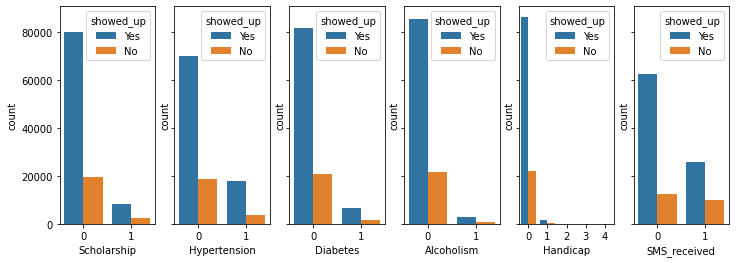

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols=6, sharey=True)
sns.countplot(x='Scholarship', data=df, hue='showed_up', ax=ax1);
sns.countplot(x='Hypertension', data=df, hue='showed_up', ax=ax2);
sns.countplot(x='Diabetes', data=df, hue='showed_up', ax=ax3);
sns.countplot(x='Alcoholism', data=df, hue='showed_up', ax=ax4);
sns.countplot(x='Handicap', data=df, hue='showed_up', ax=ax5);
sns.countplot(x='SMS_received', data=df, hue='showed_up', ax=ax6);
fig.set_figwidth(12)
fig.set_figheight(4)

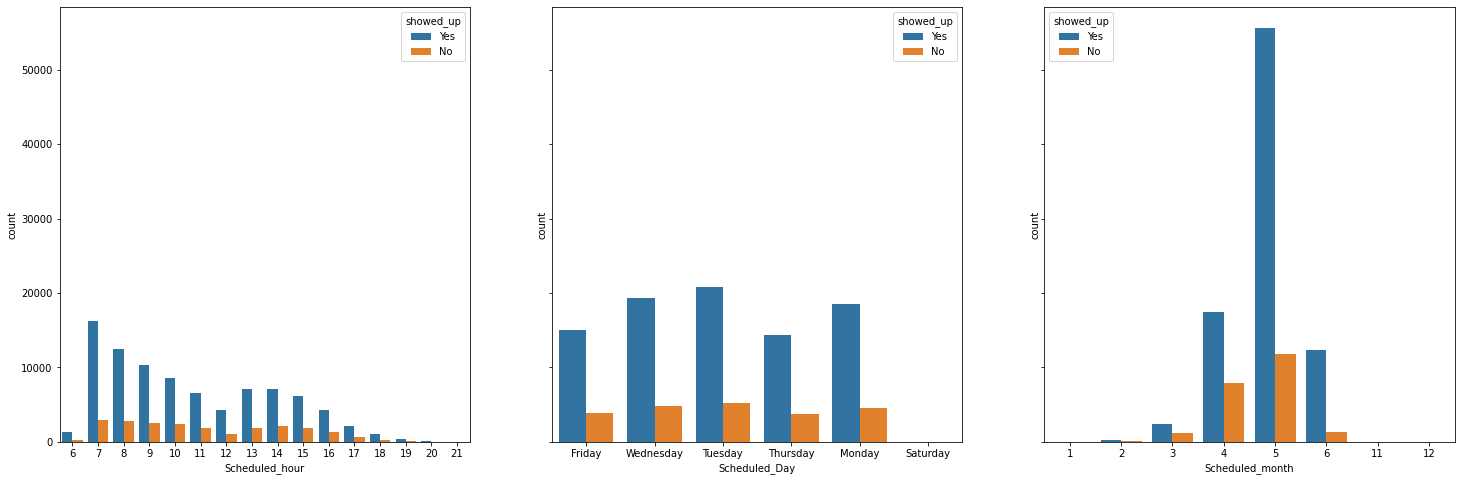

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.countplot(x='Scheduled_hour', data=df, hue='showed_up',ax=ax1);
sns.countplot(x='Scheduled_Day', data=df, hue='showed_up',ax=ax2);
sns.countplot(x='Scheduled_month', data=df, hue='showed_up',ax=ax3);
fig.set_figwidth(25)
fig.set_figheight(8)

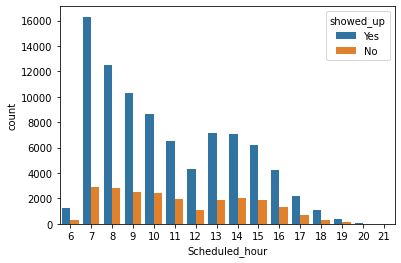

In [ ]:
sns.countplot(x='Scheduled_hour', data=df, hue='showed_up');
plt.show()